# Aula 1

## Introdução ao Tesseract OCR

OCR -> Optical Character Recognition - reconhecimento ótico de caracteres

[Documentação](https://pypi.org/project/pytesseract/)

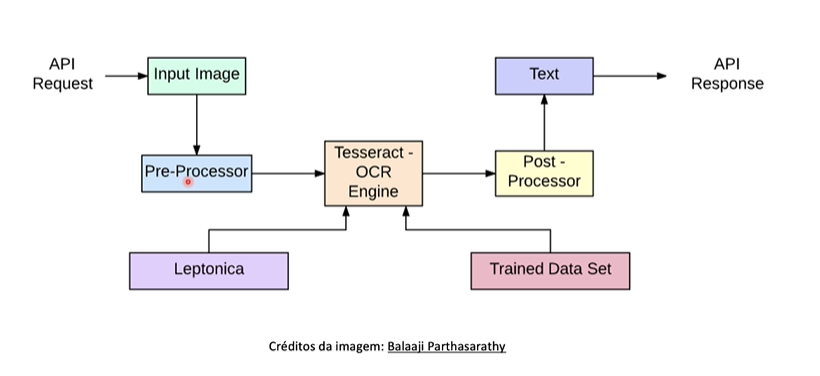

## Instalar o Tesseract e importar as bibliotecas

In [1]:
import pytesseract
import numpy as np
import cv2 # OpenCV

In [2]:
cv2.__version__

'4.5.5'

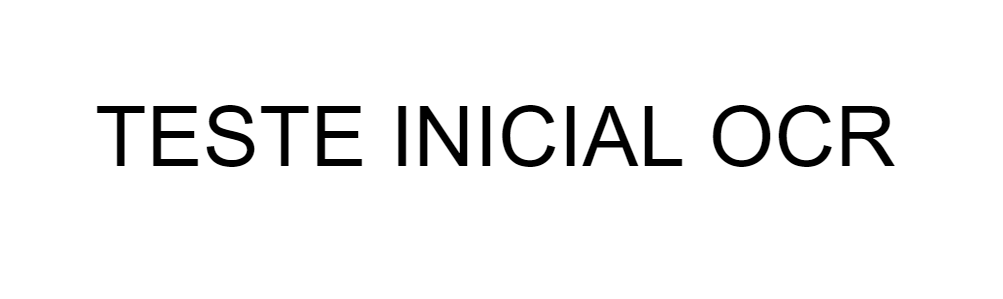

In [7]:
img = cv2.imread('/content/teste.png')
cv2_imshow(img) # BGR (RGB)

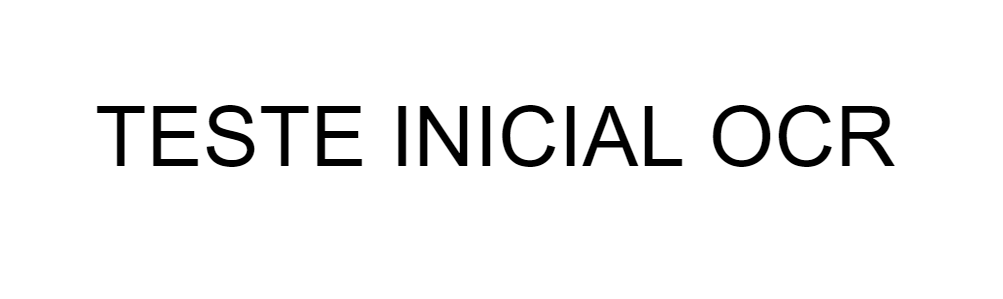

In [8]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [9]:
texto = pytesseract.image_to_string(rgb)

In [10]:
print(texto)

TESTE INICIAL OCR



## Vendo os efeitos de cores

Para vermos realmente a mudança de BGR para RGB, podemos usar uma imagem com mais cores, nesse caso vamos usar a logo do Tesseract OCR.

https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html

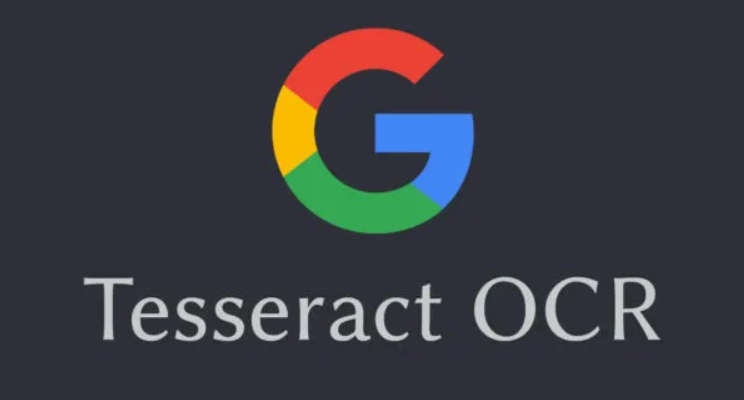

In [11]:
img = cv2.imread('/content/ocr.png')
cv2_imshow(img) # BGR (RGB)

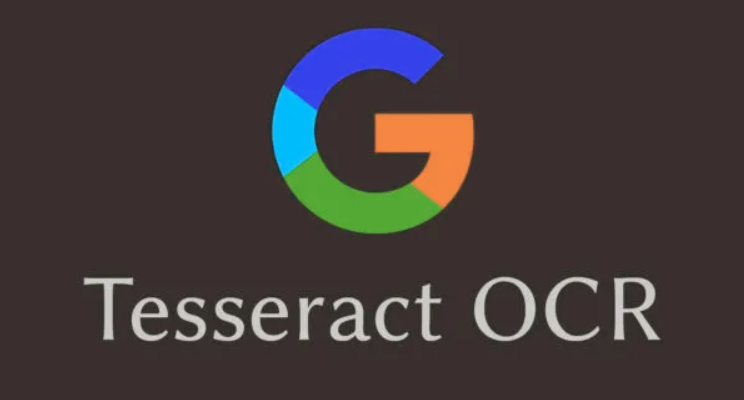

In [12]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

Teoricamente, não era pra ficar dessas cores, desse jeito, MASSSSS, segundo o Geeks4Geeks tá ok

 https://stackoverflow.com/questions/50963283/python-opencv-imshow-doesnt-need-convert-from-bgr-to-rgb

 https://www.geeksforgeeks.org/convert-bgr-and-rgb-with-python-opencv/


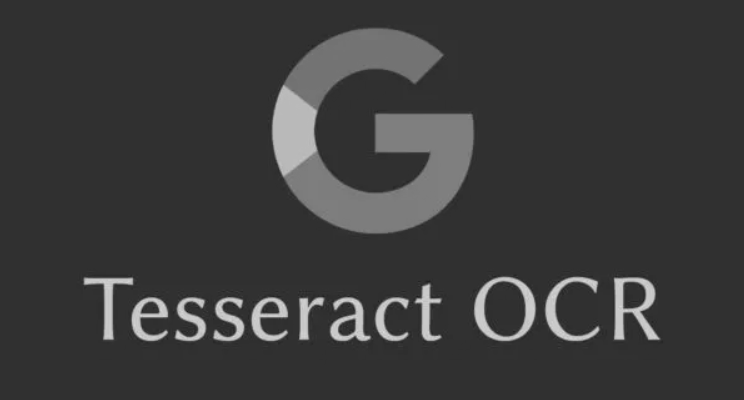

In [13]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grey)

In [14]:
texto = pytesseract.image_to_string(rgb)
print(texto) 

c

Tesseract OCR



# Aula 2


## Textos com caracteres diferentes

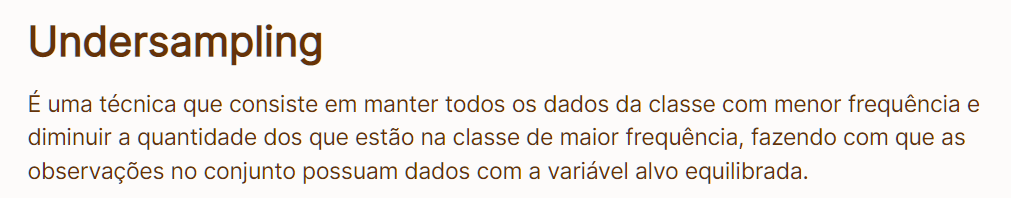

In [15]:
img = cv2.imread('/content/undersampling.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [16]:
texto = pytesseract.image_to_string(rgb)
print(texto)

Undersampling

E uma técnica que consiste em manter todos os dados da classe com menor frequéncia e
diminuir a quantidade dos que estdo na classe de maior frequéncia, fazendo com que as
observagées no conjunto possuam dados com a variavel alvo equilibrada.



As palavras **frequência** e **observações** não conseguiram ser traduzidas de uma forma boa o suficiente, o que nos faz pensar que o Tesseract está com algum problema e vamos verificar quais as listas de línguas que estão instaladas atualmente no sistema para auxiliar na leitura das nossas imagens, para isso usamos:

```
!tesseract --list-langs
```

In [17]:
!tesseract --list-langs

List of available languages (3):
por
eng
osd


In [18]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-por is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [19]:
!tesseract --list-langs

List of available languages (3):
por
eng
osd


Agora já temos o português instalado e podemos passar novamente a imagem e definir que ela seja "lida" pelo Tesseract usando o português, para isso contamos com o  método `lang`.

In [20]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



## Pasta com as línguas usadas no projeto

Para um projeto maior, ao invés de importarmos todas as vezes da forma que fizemos anteriormente com o `!apt-get install tesseract-ocr-por`podemos fazer uma pasta dentro do Google Colab e baixar diretamente do [GitHub do Tesseract os modelos já treinados em determinados idiomas](https://github.com/tesseract-ocr/tessdata), então se por algum acaso eu esteja trabalhando com imagens que tenham **italiano**, posso ter esse modelo na pasta e apenas utilizá-lo.


In [21]:
!mkdir tessdata

mkdir: cannot create directory ‘tessdata’: File exists


In [22]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

--2022-07-13 14:38:47--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2022-07-13 14:38:47--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2022-07-13 14:38:47--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awa

In [23]:
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2022-07-13 14:38:47--  https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata [following]
--2022-07-13 14:38:47--  https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/eng.traineddata [following]
--2022-07-13 14:38:47--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/eng.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awa

In [24]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



In [25]:
!ls tessdata/

eng.traineddata  por.traineddata


## Page segmentation Modes (PSM)

In [26]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


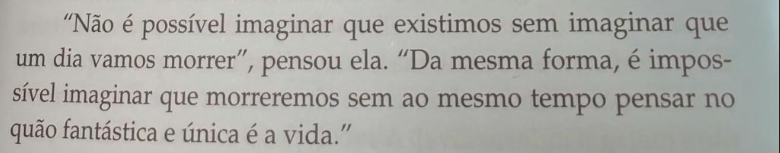

In [27]:

img = cv2.imread('/content/trecho-livro.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [28]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



In [29]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



In [30]:
#tratar o texto como uma única linha, vai dar certo?
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

In [31]:
#tratar o texto como uma única palavra, vai dar certo?
config_tesseract = '--tessdata-dir tessdata --psm 8'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

ªfâ%êããããââª%%?ªííÉ:D;Z:Én:gíríãrgâgíie::ugfâ|



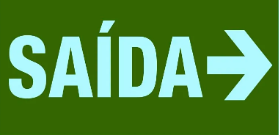

In [32]:
img = cv2.imread('/content/Saida.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [33]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDAS



## PIL - Detecção de orientação da página

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

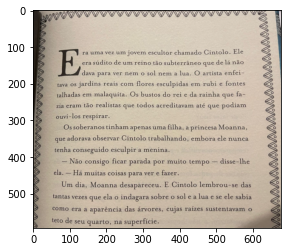

In [35]:
img = Image.open('/content/livro.png')
plt.imshow(img);

In [36]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.93
Script: Latin
Script confidence: 2.46



# Aula 3

## Selecionando textos

In [37]:
from pytesseract import Output

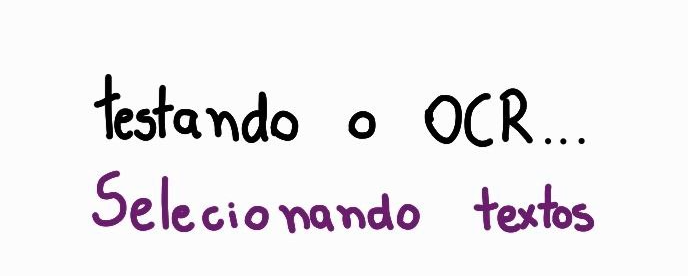

In [38]:
img = cv2.imread('/content/testando.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

- block_num = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

- conf = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

- height = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

- left = coordenada x onde inicia a caixa delimitadora

- level = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:
  1. página
  2. bloco
  3. parágrafo
  4. linha
  5. palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

- line_num = número da linha do que foi detectado (inicia com 0)

- page_num = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

- text = o resultado do reconhecimento

- top = coordenada y onde a caixa delimitadora começa

- width = largura do bloco de texto atual detectado

- word_num = numero da palavra (indice) dentro do bloco atual


In [39]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'conf': ['-1', '-1', '-1', '-1', 63, 90, 48, '-1', 85, 77],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'text': ['',
  '',
  '',
  '',
  'Testando',
  'o',
  'OCR..',
  '',
  'Selecionando',
  'textos'],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2]}

In [40]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

## Criando a caixa delimitadora

In [41]:
def caixa_texto(resultado, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img

In [42]:
len(resultado['text'])

10

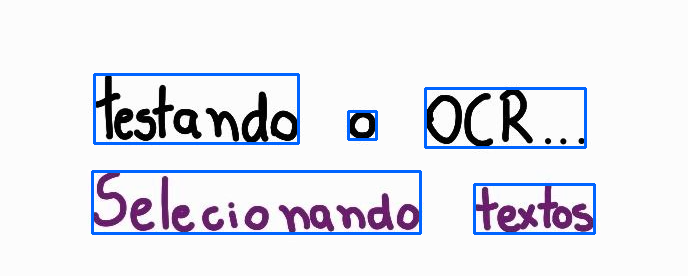

In [43]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

## Caixa e texto

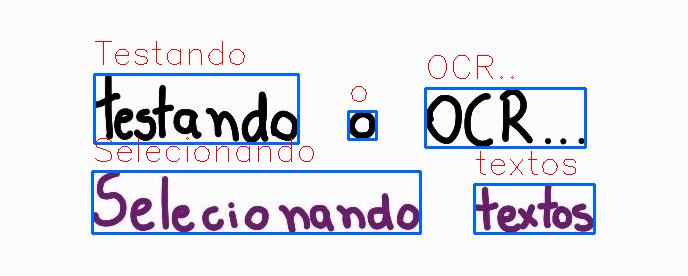

In [44]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  #print(i)
  confianca = int(resultado['conf'][i])
  #print(confianca)
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    #print(x, y)
    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
cv2_imshow(img_copia)

## Fontes

In [45]:
img = cv2.imread('/content/ocr.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [46]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2],
 'conf': ['-1', '-1', '-1', '-1', 91, '-1', '-1', '-1', 91, 90],
 'height': [400, 205, 205, 205, 205, 64, 64, 64, 63, 64],
 'left': [0, 272, 272, 272, 272, 84, 84, 84, 84, 474],
 'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'text': ['', '', '', '', 'G', '', '', '', 'Tesseract', 'OCR'],
 'top': [0, 28, 28, 28, 28, 277, 277, 277, 278, 277],
 'width': [744, 202, 202, 202, 202, 576, 576, 576, 357, 186],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2]}

In [47]:
from PIL import ImageFont, ImageDraw, Image
fonte = '/content/calibri.ttf'

In [48]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img

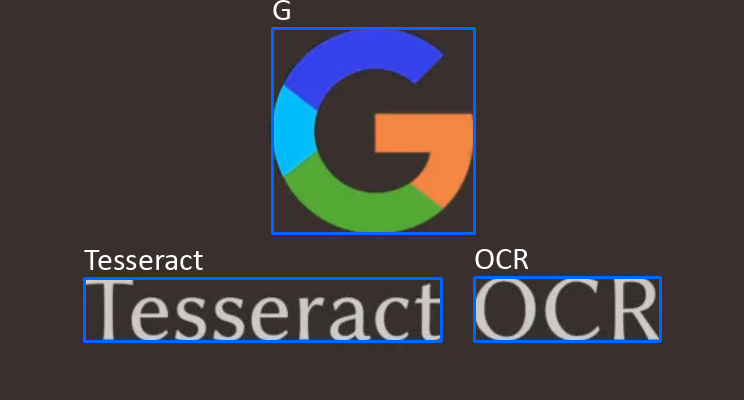

In [49]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    texto = resultado['text'][i]
    #cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)

# Aula 4

## Busca com expressões regulares

In [50]:
import re # regular expressions

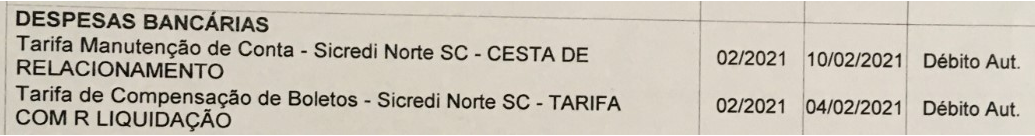

In [51]:
#achar alguma outra imagem para trocar, peguei essa do curso
img = cv2.imread('/content/tabela_teste.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [52]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  91,
  91,
  '-1',
  '-1',
  '-1',
  92,
  91,
  91,
  92,
  93,
  92,
  91,
  92,
  94,
  92,
  92,
  91,
  86,
  86,
  88,
  '-1',
  90,
  '-1',
  92,
  92,
  92,
  93,
  92,
  93,
  92,
  91,
  93,
  96,
  92,
  86,
  86,
  79,
  82,
  '-1',
  '-1',
  '-1',
  91,
  93,
  87],
 'height': [136,
  22,
  22,
  22,
  19,
  21,
  82,
  82,
  34,
  17,
  22,
  16,
  16,
  2,
  17,
  16,
  15,
  2,
  16,
  15,
  16,
  15,
  16,
  15,
  20,
  20,
  32,
  17,
  16,
  21,
  16,
  16,
  3,
  16,
  16,
  16,
  2,
  16,
  15,
  16,
  15,
  15,
  23,
  23,
  23,
  16,
  16,
  23],
 'left': [0,
  16,
  16,
  16,
  16,
  144,
  16,
  16,
  16,
  16,
  81,
  208,
  238,
  301,
  315,
  385,
  441,
  475,
  488,

In [53]:
# https://regexr.com/
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

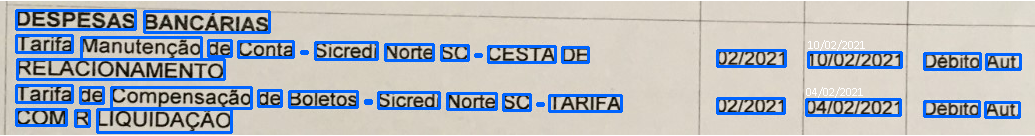

In [54]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

## Destaque de informações

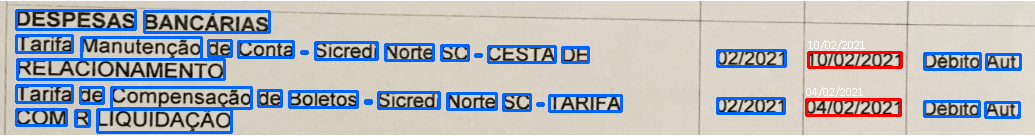

In [55]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

In [56]:
datas

['10/02/2021', '04/02/2021']

## Cenários naturais

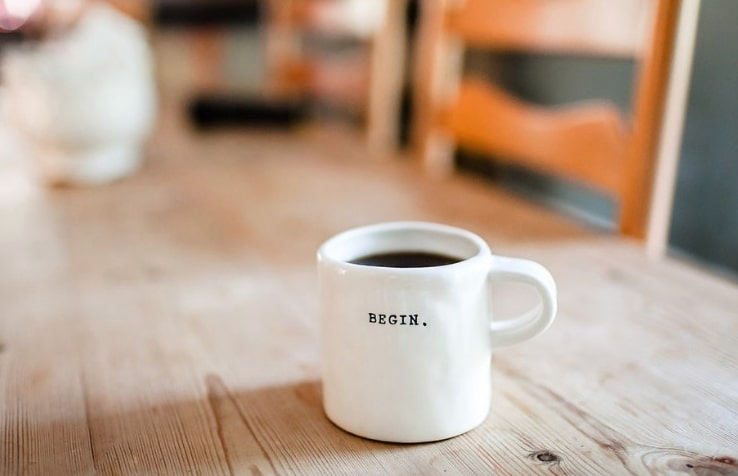

In [57]:
#trocar imagem
img = cv2.imread('/content/xicara1.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [58]:
resultado = pytesseract.image_to_data(rgb, lang="por", output_type=Output.DICT)
resultado

{'block_num': [0, 1, 1, 1, 1],
 'conf': ['-1', '-1', '-1', '-1', 95],
 'height': [476, 476, 476, 476, 476],
 'left': [0, 0, 0, 0, 0],
 'level': [1, 2, 3, 4, 5],
 'line_num': [0, 0, 0, 1, 1],
 'page_num': [1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1],
 'text': ['', '', '', '', ''],
 'top': [0, 0, 0, 0, 0],
 'width': [738, 738, 738, 738, 738],
 'word_num': [0, 0, 0, 0, 1]}

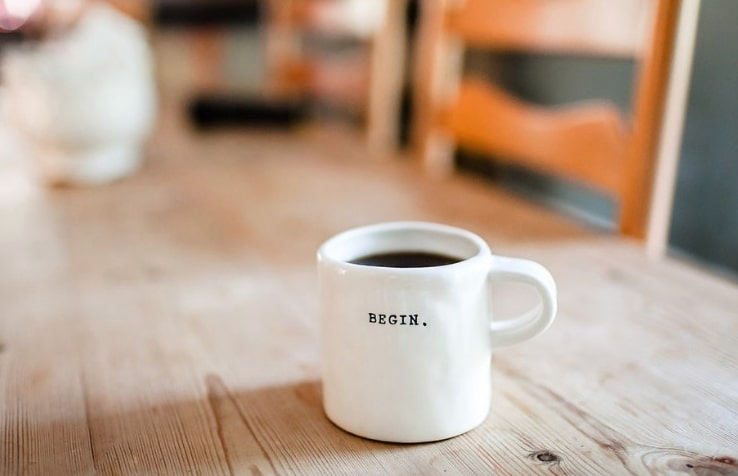

In [59]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if not texto.isspace() and len(texto) > 0:
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)

In [60]:
cv2.__version__

'4.0.0'

# Aula 5